In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Случай достаточно сильного напряжения

In [2]:
model_dir = 'data_profile/'

In [3]:
model_strong = model_from_file(model_dir + 'model_strong.csv')

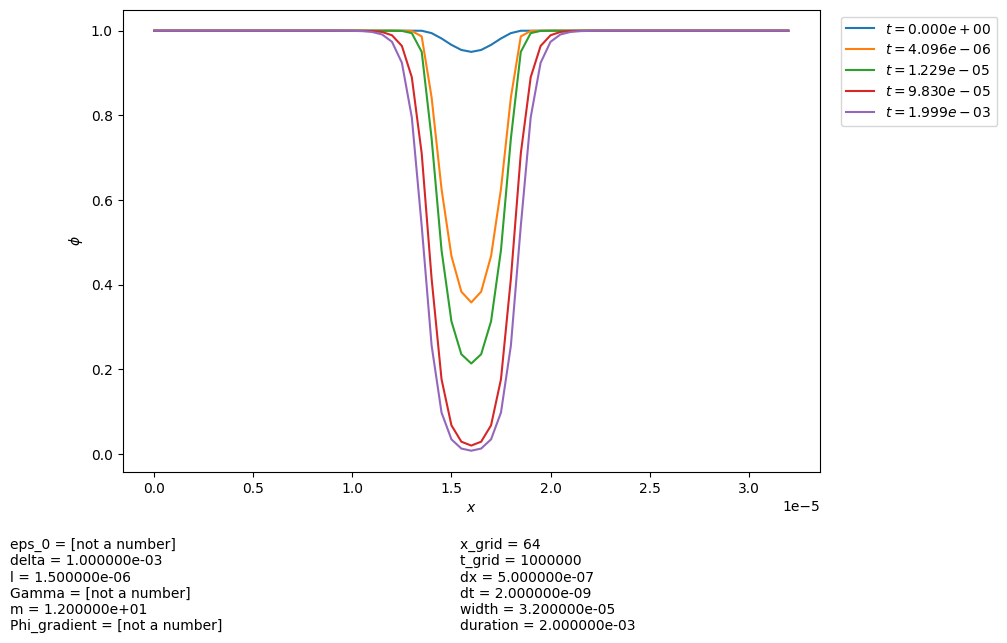

In [4]:
model_plot(model_strong, [0, 4e-6, 1.2e-5, 1e-4, 2e-3], figsize=(9, 6))

In [5]:
def model_f(phi):
    return 4 * phi**3 - 3 * phi**4

def model_g(phi):
    return 3 * phi**2 - 2 * phi**3

In [6]:
phi = model_strong.phi[-1]

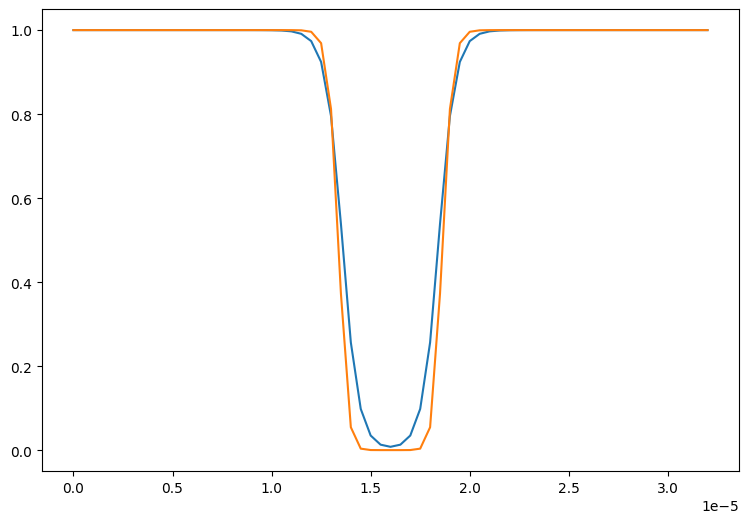

In [7]:
plt.figure(figsize=(9, 6))
plt.plot(model_strong.xs, phi)
plt.plot(model_strong.xs, model_f(phi))
plt.show()

In [8]:
print(phi.min())
print(model_f(phi).min())
print(model_g(phi).min())

0.00785343124
1.9260729798802527e-06
0.00018406040427009412


In [9]:
def integral(f, dx):
    return dx * (
        f[1:-1].sum() +
        0.5 * (f[0] + f[-1])
    )

In [10]:
xs_right = model_strong.xs[:33]
phi_right = np.array(phi[32:])
middle = xs_right[-1] - integral(phi_right, model_strong.params['dx'])
middle

np.float64(2.4376922605900015e-06)

In [11]:
r = 0.5 * model_strong.params['q'] * model_strong.params['l'] * np.sqrt(
    model_strong.params['delta'] / (2.0 * 2.6 * 3.12228e-10 * 2.6 * 8.85e-12)
)
r

np.float64(2.4541175111507257e-06)

При расчете радиуса канала $r$ по формуле нужно использовать вдвое меньший заряд!

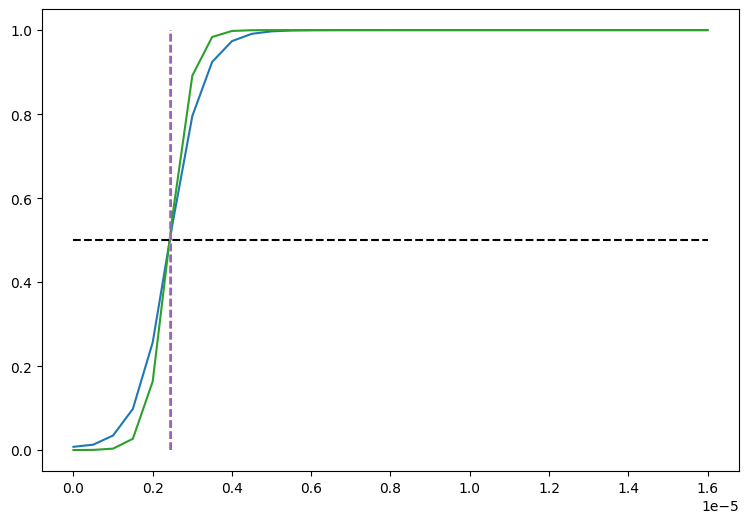

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(xs_right, phi_right)
plt.plot(xs_right, model_g(phi_right), color='C2')
plt.plot(xs_right[[0, -1]], [0.5, 0.5], '--', color='black')
plt.plot([middle, middle], [0, 1], '--', color='C1')
plt.plot([r, r], [0, 1], '--', color='C4')
plt.show()

In [13]:
class Sigmoid:
    def __init__(self, scale, offset):
        self.scale = scale
        self.offset = offset

    def __call__(self, x):
        s = self.scale * (x - self.offset)
        return np.exp(s) / (np.exp(s) + 1.0)

In [14]:
sigmoid = Sigmoid(2.0 * np.sqrt(3.0) / model_strong.params['l'], middle)
sigmoid_xs = np.linspace(0, xs_right[-1], 300)
sigmoid_ys = sigmoid(sigmoid_xs)

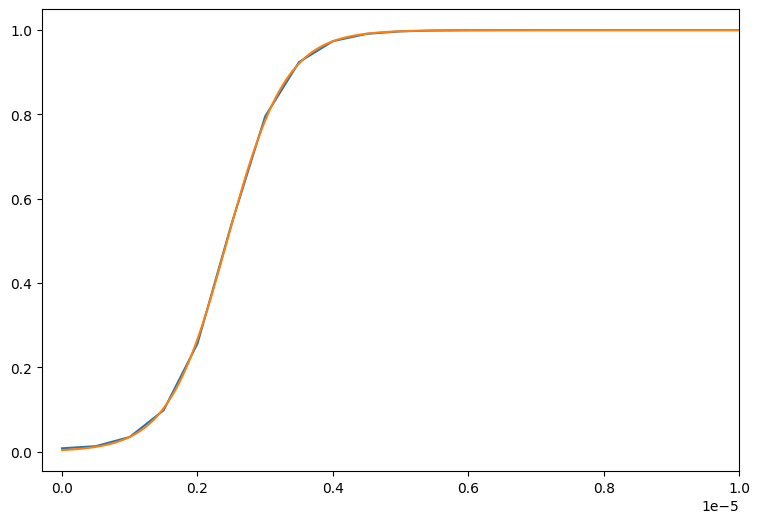

In [15]:
plt.figure(figsize=(9, 6))
plt.xlim([-3e-7, 1e-5])
plt.plot(xs_right, phi_right)
plt.plot(sigmoid_xs, sigmoid_ys)
plt.show()

## Случай слабого напряжения

Было $q^+ = 2 \cdot 10^{-8}$, проведем расчеты с $q^+$ в $10$, $100$ и $200$ раз меньше.

In [16]:
model_weak_1 = model_from_file(model_dir + 'model_weak_1.csv')

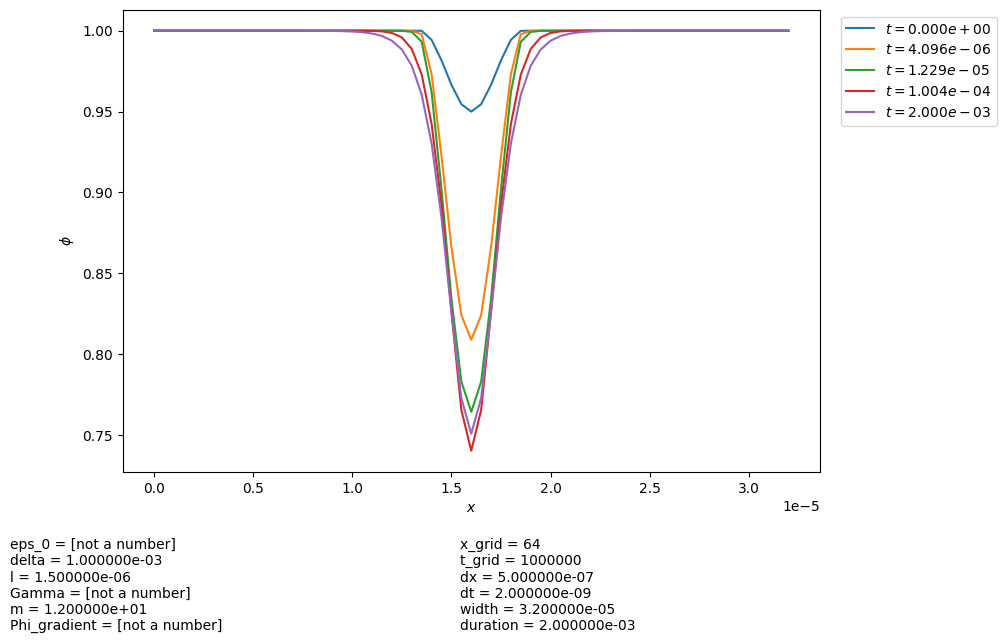

In [17]:
model_plot(model_weak_1, [0, 4e-6, 1.2e-5, 1e-4, 2e-3], figsize=(9, 6))

In [18]:
model_weak_2 = model_from_file(model_dir + 'model_weak_2.csv')

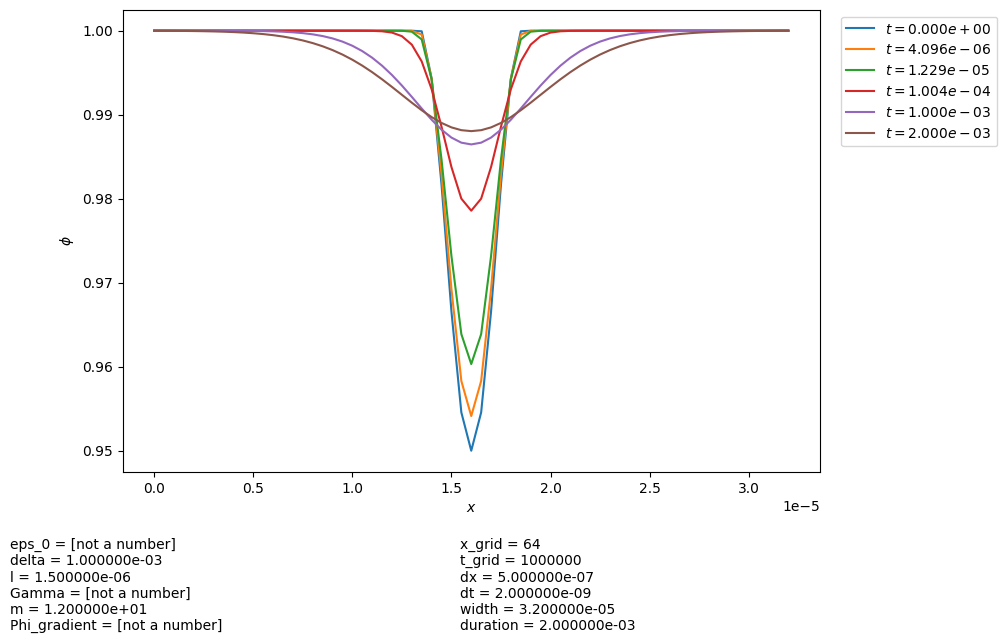

In [19]:
model_plot(model_weak_2, [0, 4e-6, 1.2e-5, 1e-4, 1e-3, 2e-3], figsize=(9, 6))

In [20]:
model_weak_3 = model_from_file(model_dir + 'model_weak_3.csv')

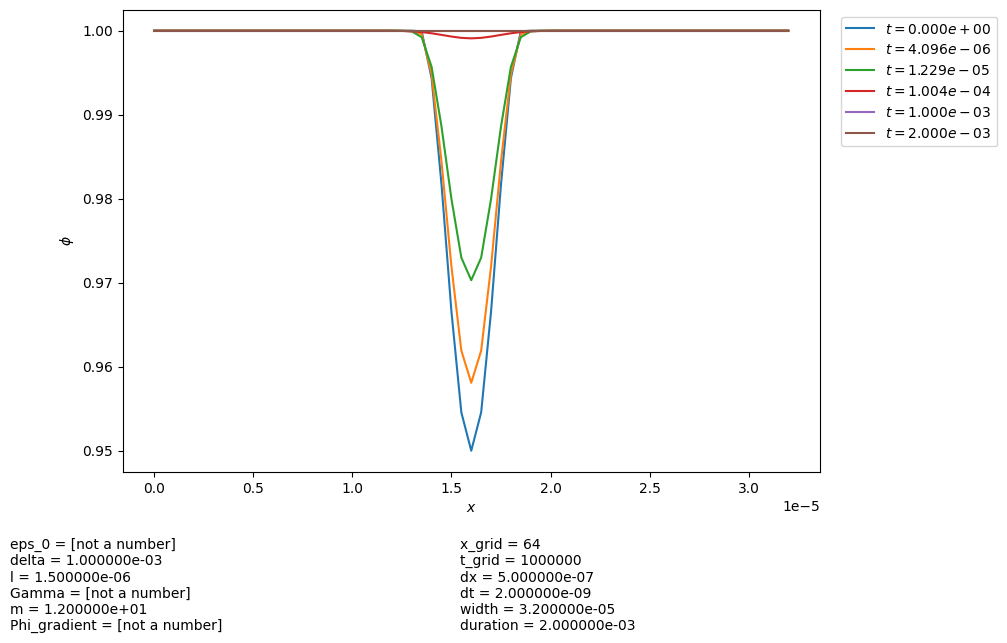

In [21]:
model_plot(model_weak_3, [0, 4e-6, 1.2e-5, 1e-4, 1e-3, 2e-3], figsize=(9, 6))